In [1]:
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
# import seaborn as sns; sns.set()
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns


Bad key "text.kerning_factor" on line 4 in
/home/mhassan/miniconda3/envs/smiles_transformer/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
df = pd.read_csv("data/250k_rndm_zinc_drugs_clean_3_scaled.csv")
df.head()

canonical_smiles      logP       qed  \
0            CC(C)(C)c1ccc2occ(CC(=O)Nc3ccccc3F)c2c1  0.370439  0.739857   
1       C[C@@H]1CC(Nc2cncc(-c3nncn3C)c2)C[C@@H](C)C1  0.363490  0.979560   
2  N#Cc1ccc(-c2ccc(O[C@@H](C(=O)N3CCCC3)c3ccccc3)...  0.370142  0.631783   
3  CCOC(=O)[C@@H]1CCCN(C(=O)c2nc(-c3ccc(C)cc3)n3c...  0.366671  0.728168   
4  N#CC1=C(SCC(=O)Nc2cccc(Cl)c2)N=C([O-])[C@H](C#...  0.365269  0.831756   

        sas  
0  0.120455  
1  0.270223  
2  0.163404  
3  0.202528  
4  0.337242

In [3]:
# load encoded vectors
encoded = np.load('encoded.npy')
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(encoded)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])

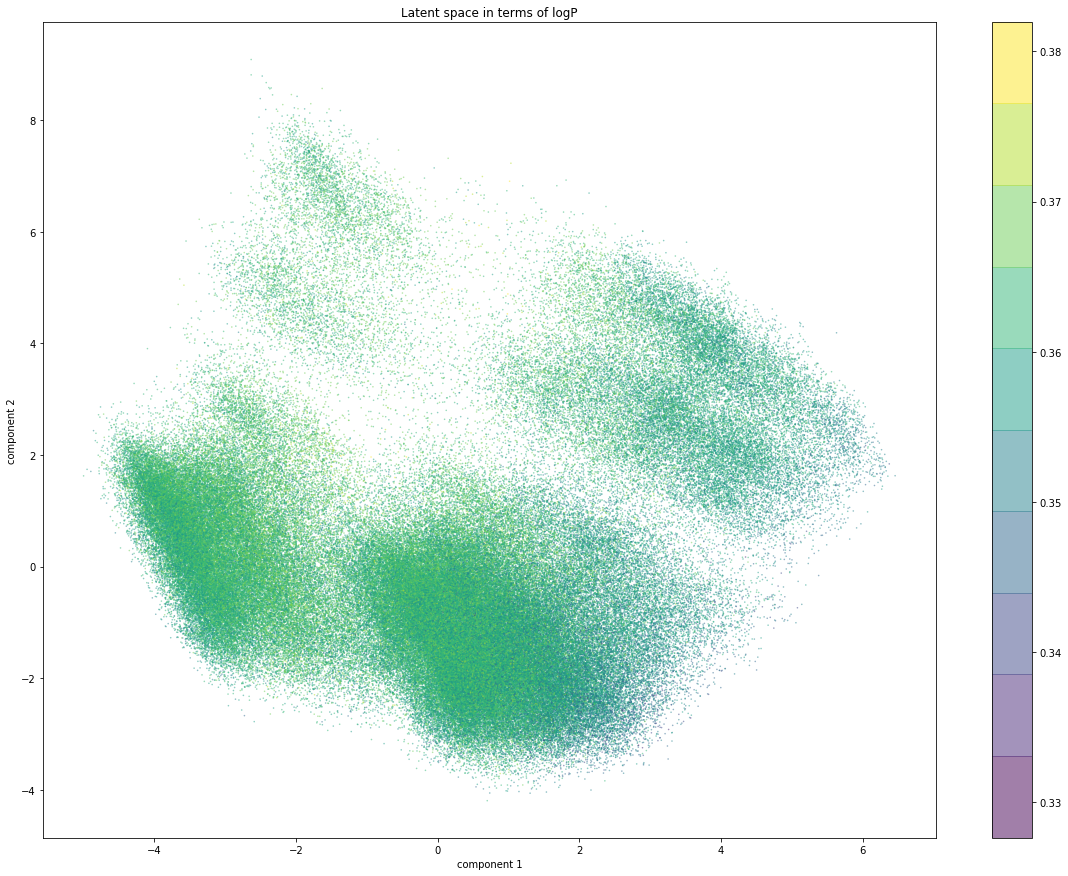

In [20]:
plt.figure(figsize=(20, 15))
plt.scatter(principalComponents[:, 0], principalComponents[:, 1],
            c=df.logP, edgecolor='none', s=10, alpha=0.5, marker='.',
            cmap=plt.cm.get_cmap('viridis', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title("Latent space in terms of logP")
plt.colorbar();
plt.savefig('logp.png', dpi=100)

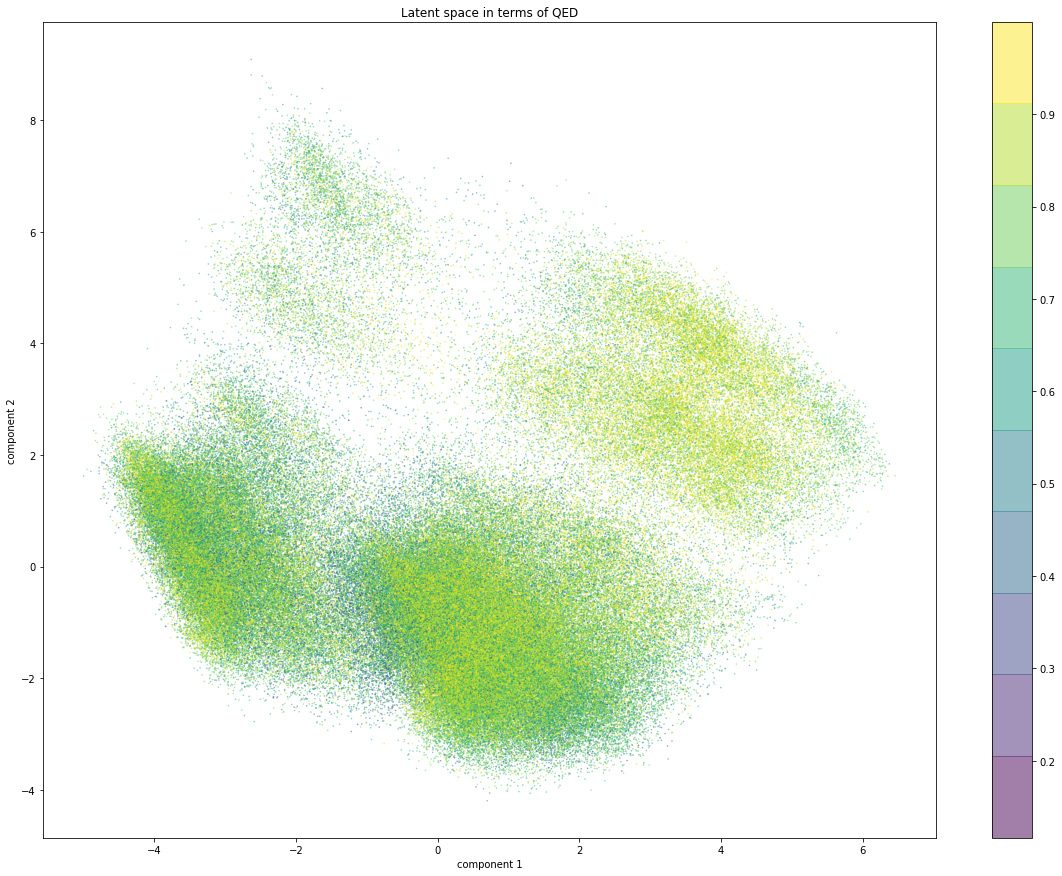

In [21]:
plt.figure(figsize=(20, 15))
plt.scatter(principalComponents[:, 0], principalComponents[:, 1],
            c=df.qed, edgecolor='none', s=10, alpha=0.5, marker='.',
            cmap=plt.cm.get_cmap('viridis', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title("Latent space in terms of QED")
plt.colorbar();
plt.savefig('qed.png', dpi=100)

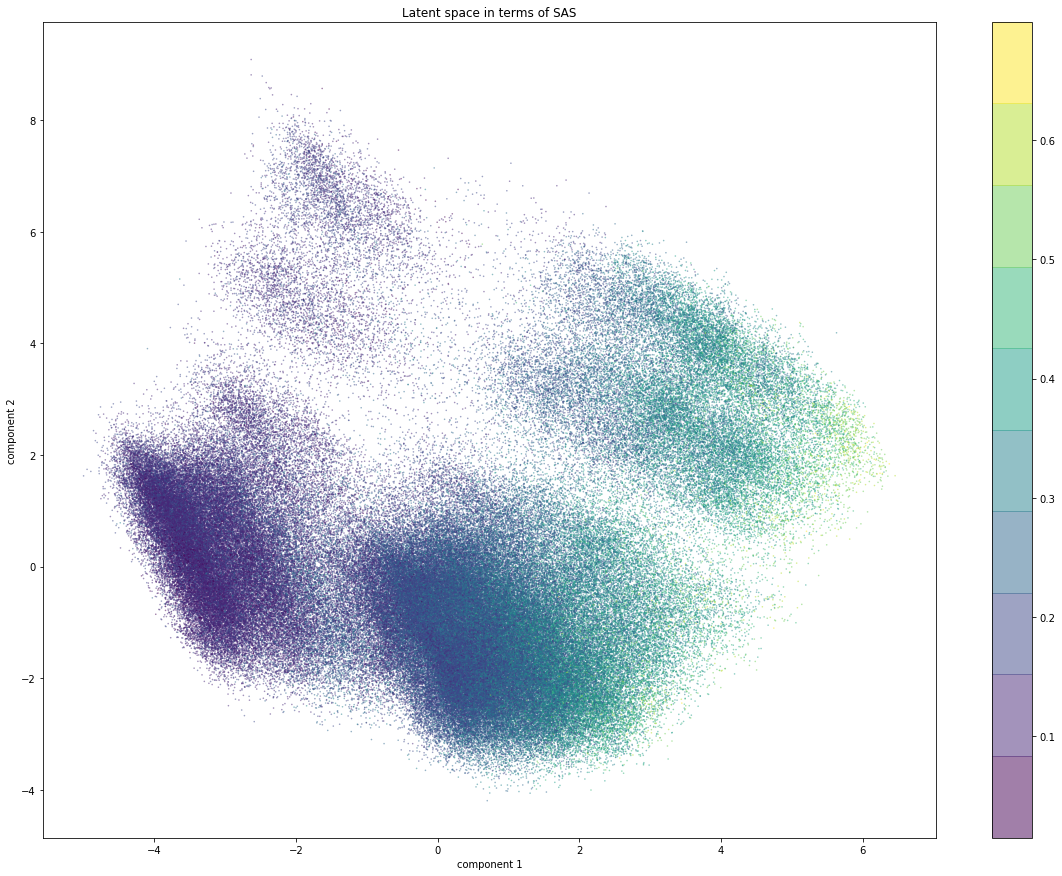

In [22]:
plt.figure(figsize=(20, 15))
plt.scatter(principalComponents[:, 0], principalComponents[:, 1],
            c=df.sas, edgecolor='none', s=10, alpha=0.5, marker='.',
            cmap=plt.cm.get_cmap('viridis', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title("Latent space in terms of SAS")
plt.colorbar();
plt.savefig('sas.png', dpi=100)

## 3D PCA

In [23]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(encoded)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2', 'pc3'])

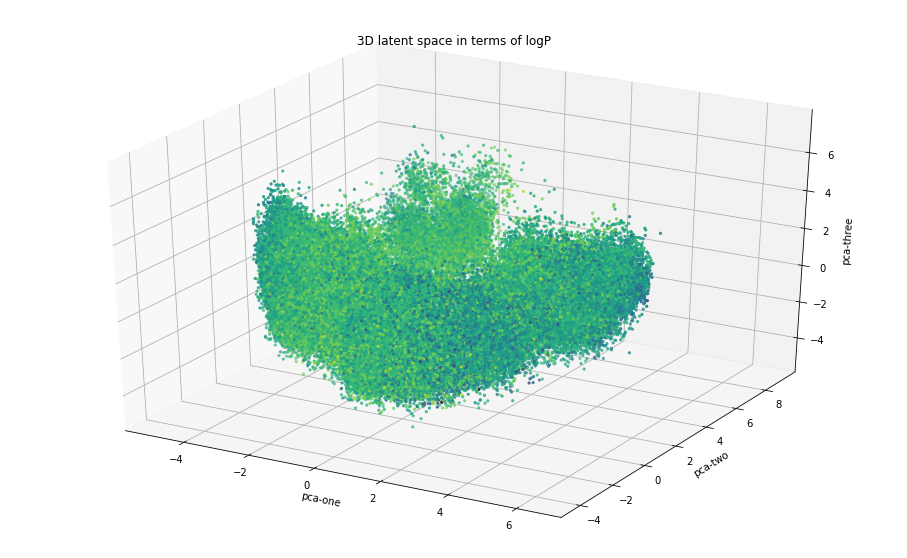

In [28]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=principalComponents[:, 0], 
    ys=principalComponents[:, 1], 
    zs=principalComponents[:, 2], 
    c=df.logP,  
    cmap=plt.cm.get_cmap('viridis', 10),
    marker='.'
)
plt.title("3D latent space in terms of logP")
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.savefig("logp-3d.png", dpi=100)
plt.show()

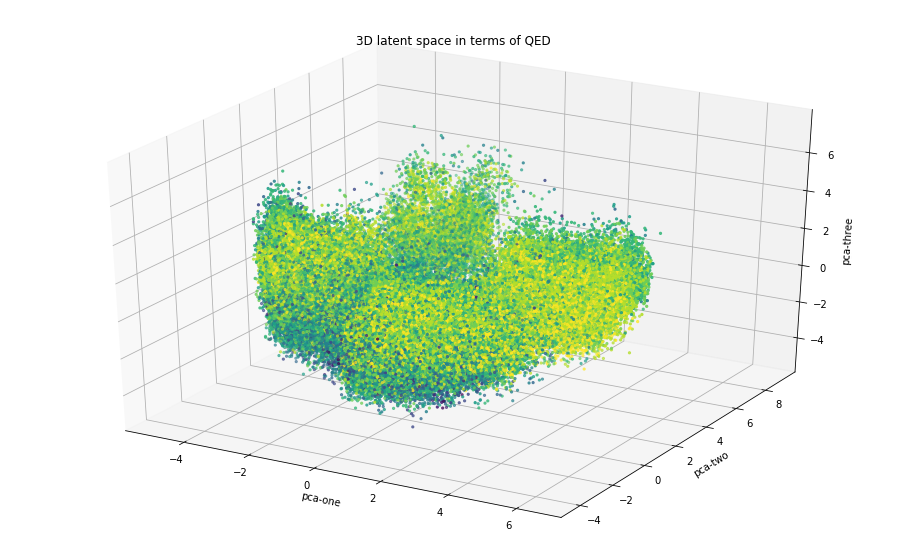

In [29]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=principalComponents[:, 0], 
    ys=principalComponents[:, 1], 
    zs=principalComponents[:, 2], 
    c=df.qed, 
    cmap=plt.cm.get_cmap('viridis', 10),
    marker='.'
)
plt.title("3D latent space in terms of QED")
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.savefig("qed-3d.png", dpi=100)
plt.show()

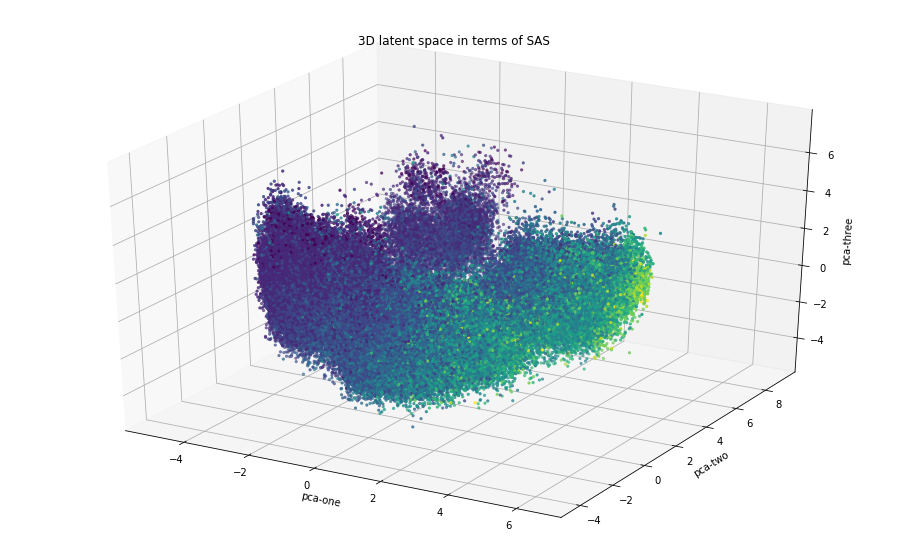

In [30]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=principalComponents[:, 0], 
    ys=principalComponents[:, 1], 
    zs=principalComponents[:, 2], 
    c=df.sas, 
    cmap=plt.cm.get_cmap('viridis', 10),
    marker='.'
)
plt.title("3D latent space in terms of SAS")
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.savefig("sas-3d.png", dpi=100)
plt.show()

In [12]:
from sklearn.manifold import TSNE

In [ ]:
encoded_reduced = TSNE(n_components=2, random_state=0).fit_transform(encoded)
y = df['logP'].values

In [ ]:
fig = plt.figure(figsize=(12,10))
plt.rcParams['font.size'] = 12
plt.scatter(encoded_reduced[:, 0], encoded_reduced[:, 1], c=y, marker='o')
plt.colorbar()
plt.show()

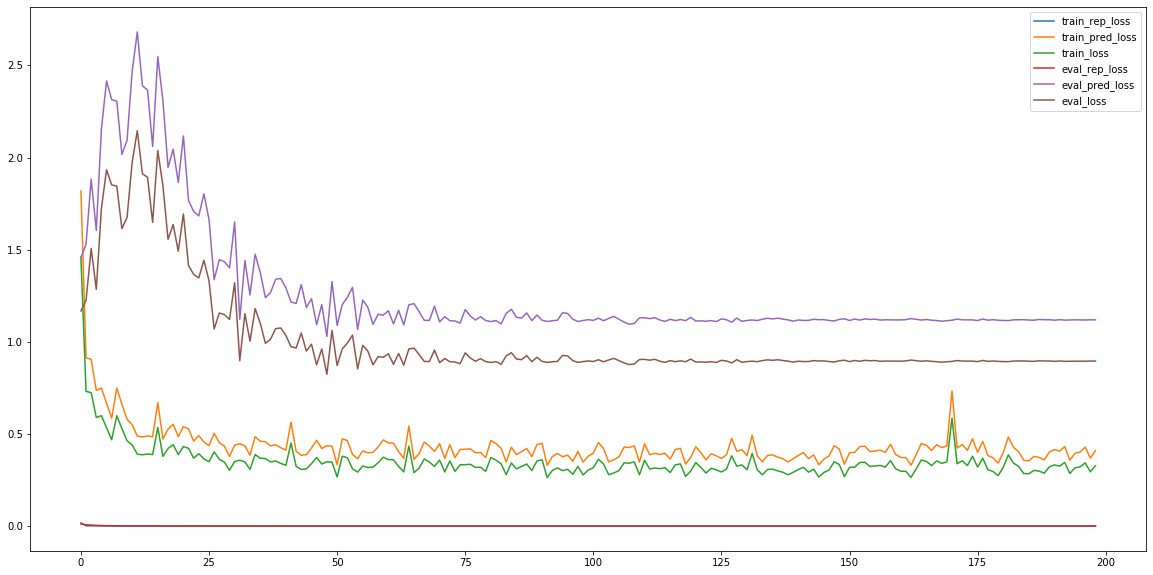

In [87]:
history = pd.read_csv("experiments/exp101/history.csv")
history.plot(figsize=(20, 10))

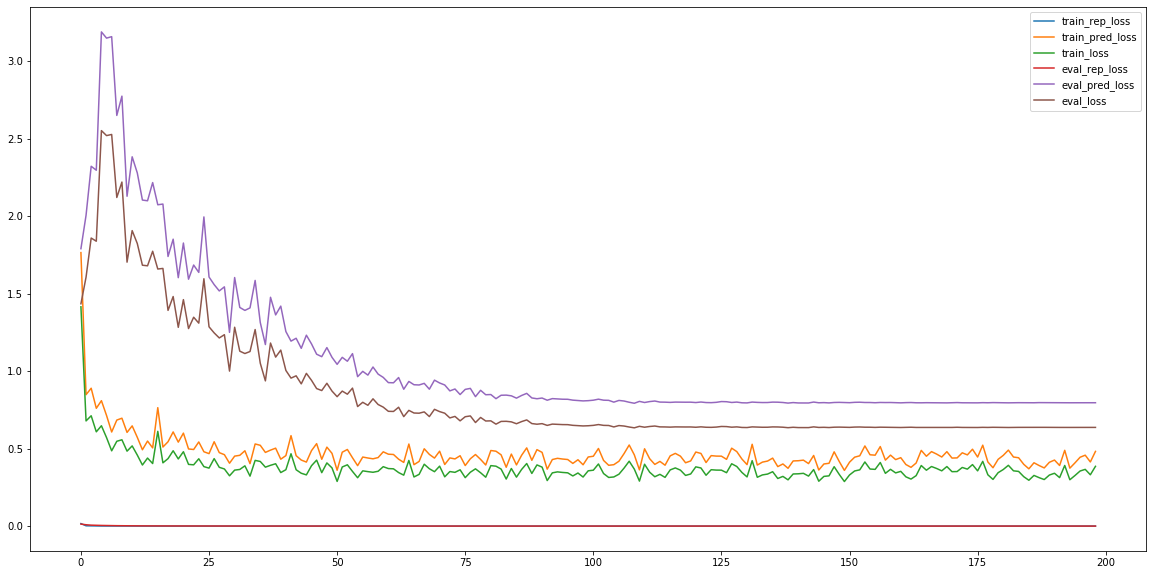

In [88]:
history = pd.read_csv("experiments/exp102/history.csv")
history.plot(figsize=(20, 10))

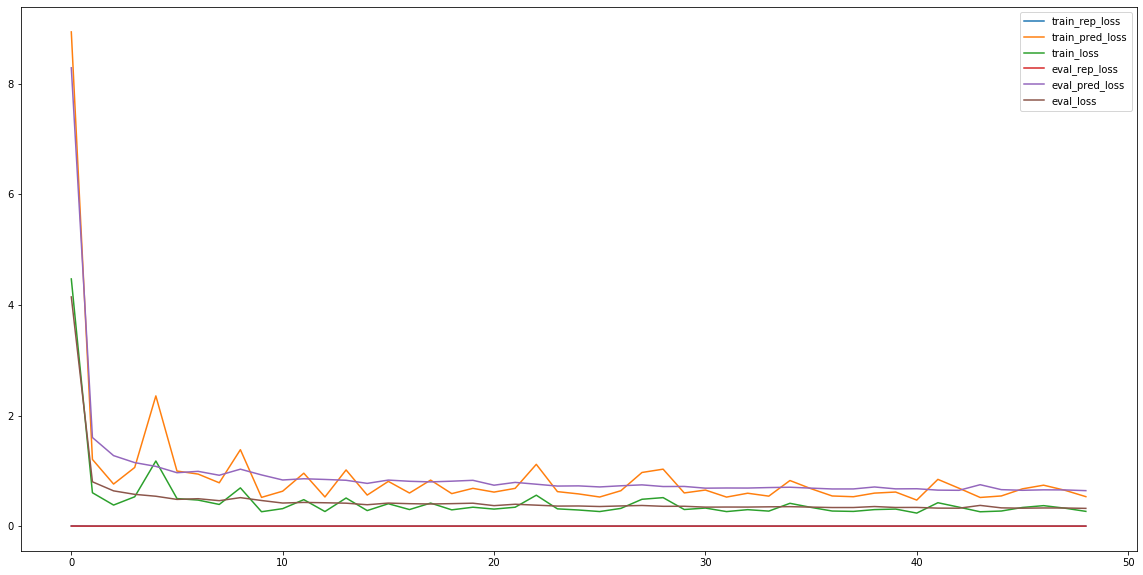

In [89]:
history = pd.read_csv("experiments/exp1/history.csv")
history.plot(figsize=(20, 10))

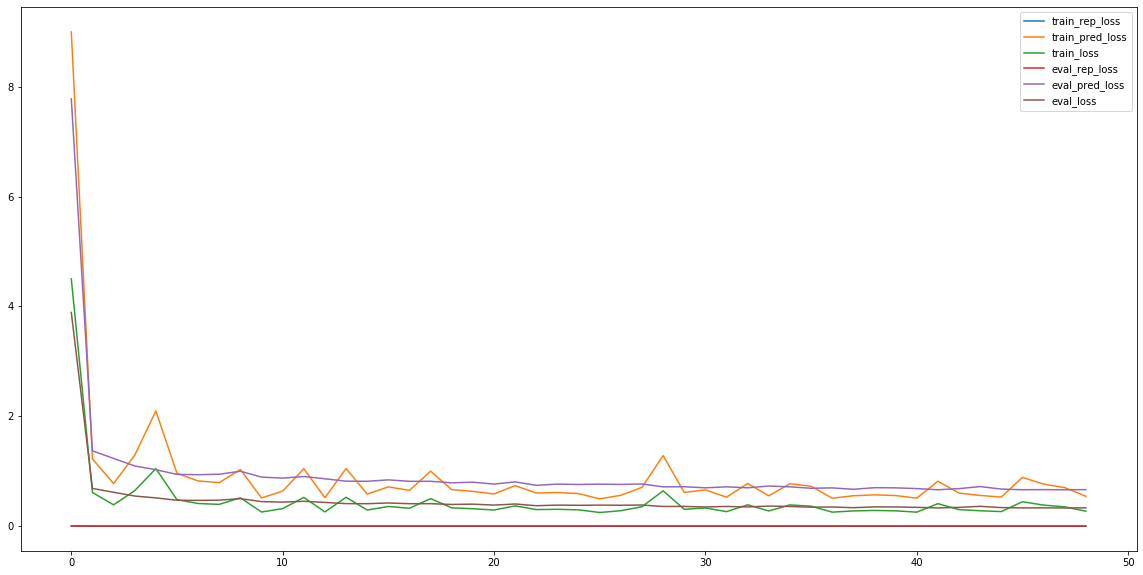

In [90]:
history = pd.read_csv("experiments/exp2/history.csv")
history.plot(figsize=(20, 10))

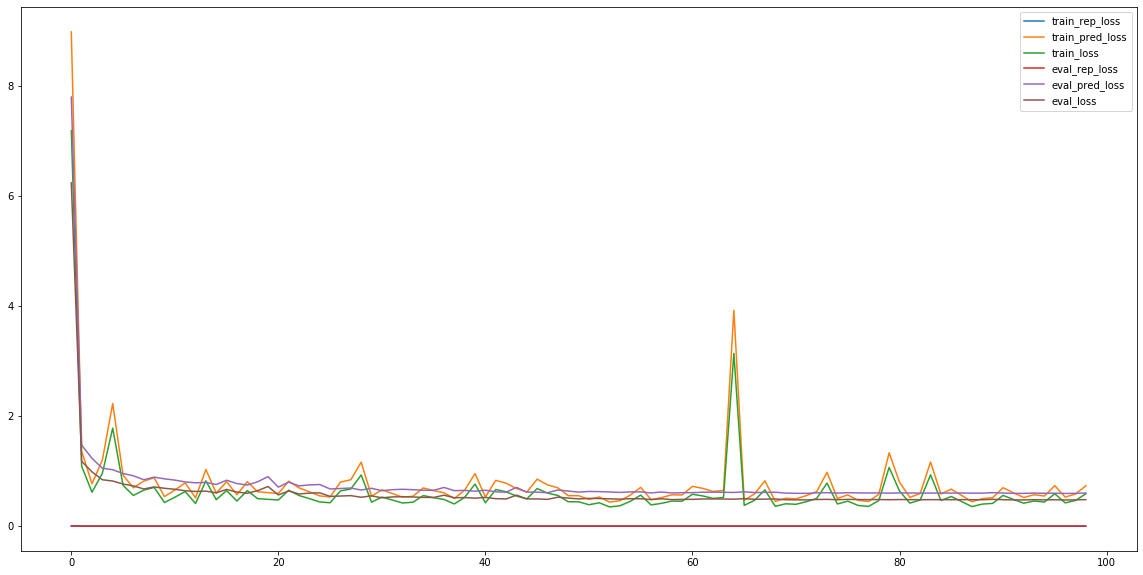

In [91]:
history = pd.read_csv("experiments/exp3/history.csv")
history.plot(figsize=(20, 10))

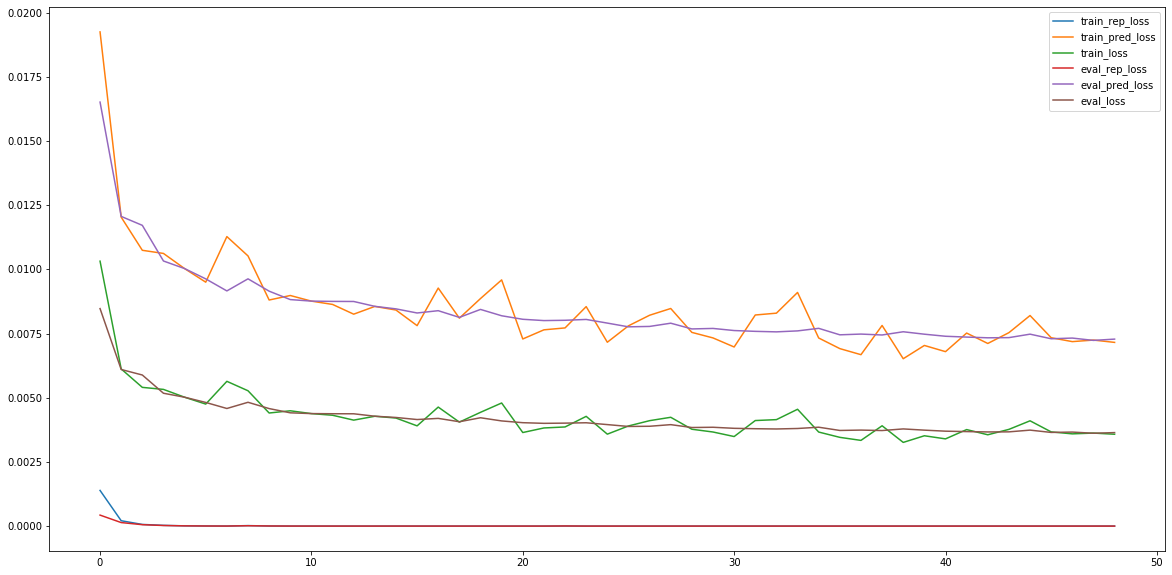

In [92]:
history = pd.read_csv("experiments/exp4/history.csv")
history.plot(figsize=(20, 10))

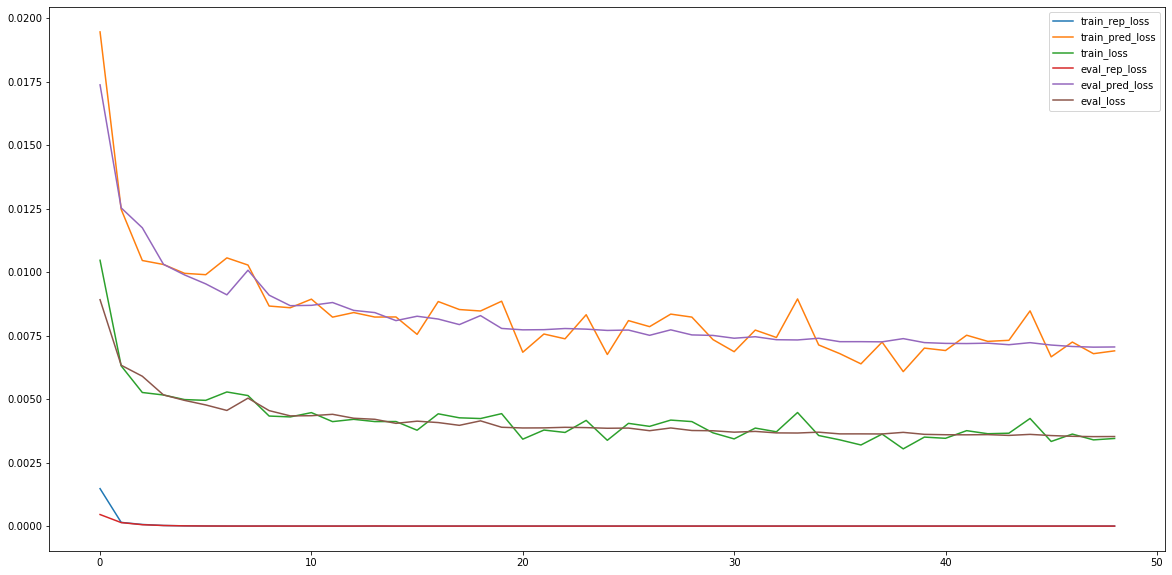

In [93]:
history = pd.read_csv("experiments/exp5/history.csv")
history.plot(figsize=(20, 10))

In [49]:
import torch
from torch.utils.data import TensorDataset, Subset

In [57]:
x = torch.rand(20, 2); x

tensor([[0.5866, 0.5332],
        [0.8366, 0.0063],
        [0.9401, 0.8375],
        [0.8978, 0.4590],
        [0.2117, 0.7793],
        [0.0266, 0.5092],
        [0.4591, 0.7787],
        [0.6383, 0.4323],
        [0.4193, 0.1863],
        [0.6250, 0.9315],
        [0.0772, 0.5598],
        [0.2923, 0.2946],
        [0.5796, 0.1431],
        [0.5684, 0.4383],
        [0.6559, 0.1569],
        [0.4228, 0.1073],
        [0.4827, 0.9146],
        [0.6116, 0.5570],
        [0.3426, 0.3225],
        [0.9313, 0.5083]])

In [58]:
dataset = TensorDataset(x)

In [66]:
test = Subset(dataset, f)
len(test)

5

In [77]:
np.delete(np.arange(len(dataset)), f)

array([ 1,  2,  4,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

In [69]:
len(test.dataset)

20

In [75]:
for x in test:
    print(x)

(tensor([0.4591, 0.7787]),)
(tensor([0.8978, 0.4590]),)
(tensor([0.0266, 0.5092]),)
(tensor([0.5866, 0.5332]),)
(tensor([0.4591, 0.7787]),)


In [63]:
dataset

In [54]:
f

array([6, 3, 5, 0, 6])

In [45]:
mask = np.ones(len(x), dtype=bool)
f = np.random.randint(10, size=(5))
mask[f] = False
mask

array([False,  True,  True, False,  True, False, False,  True,  True,
        True])

In [47]:
dataset[mask][0]

tensor([[0.1933, 0.3762],
        [0.8118, 0.0810],
        [0.1631, 0.1052],
        [0.4117, 0.3843],
        [0.1184, 0.2785],
        [0.9687, 0.8447]])

In [48]:
dataset

In [8]:
Xt = Xt.to(device='cuda')
Yt = Yt.to(device='cuda')
print(Xt.size(), Yt.size())

torch.Size([248592, 1024]) torch.Size([248592, 3])


In [9]:
dataset = TensorDataset(Xt, Yt)
test_size = int(0.1*len(dataset))
train, test = torch.utils.data.random_split(dataset, [len(dataset) - test_size, test_size])
batch_size = 64
epochs = 100
traindataloader = DataLoader(train, batch_size=batch_size, shuffle=True)#, num_workers=8, pin_memory=True)
testdataloader = DataLoader(test, batch_size=batch_size, shuffle=False)

In [10]:
def eval(model):
    model.eval()
    eval_loss = 0
    for i, (x, y) in enumerate(testdataloader):
        with torch.no_grad():
            prop = model(x)
            pred_loss = F.mse_loss(prop[:, 0], y[:, 0]) + \
                        F.mse_loss(prop[:, 1], y[:, 1]) + \
                        F.mse_loss(prop[:, 2], y[:, 2])
            eval_loss += pred_loss.item()

    return (eval_loss/len(testdataloader))

In [11]:
model = PredictorModel(1024, 3, 0.0).cuda(device="cuda")
optimizer = optim.Adam(model.parameters(), lr=1e-4)

In [12]:
model.train()
best_loss = None
for e in tqdm_notebook(range(epochs)):
    for i, (x, y) in enumerate(traindataloader):
        optimizer.zero_grad()
        prop = model(x)
        pred_loss = F.mse_loss(prop[:, 0], y[:, 0]) + \
                    F.mse_loss(prop[:, 1], y[:, 1]) + \
                    F.mse_loss(prop[:, 2], y[:, 2])
        pred_loss.backward()
        optimizer.step()
    
    
    eval_loss = eval(model)
    if e%5==0:
        print(f"Train Loss: {pred_loss.item()}")
        print(f"Eval Loss: {eval_loss}")
    if not best_loss or eval_loss < best_loss:
        best_loss = eval_loss
        torch.save(model.state_dict(), "./saved_models/%d_%f.mdl" % (e, best_loss))

/home/mhassan/miniconda3/envs/smiles_transformer/lib/python3.6/site-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


Train Loss: 0.8560492396354675
Eval Loss: 0.6363265601712205
Train Loss: 0.28453484177589417
Eval Loss: 0.30980443004470865
Train Loss: 0.2623657286167145
Eval Loss: 0.2926026750882671
Train Loss: 0.2861662209033966
Eval Loss: 0.2848143145863379
Train Loss: 0.18335600197315216
Eval Loss: 0.2837755856676396
Train Loss: 0.2956135869026184
Eval Loss: 0.2869073555141611
Train Loss: 0.26382842659950256
Eval Loss: 0.2792869941511007
Train Loss: 0.17775124311447144
Eval Loss: 0.2811605188717879
Train Loss: 0.15396934747695923
Eval Loss: 0.28320693333841535
Train Loss: 0.15040983259677887
Eval Loss: 0.2817502891726236
Train Loss: 0.17452488839626312
Eval Loss: 0.2836908488546362
Train Loss: 0.2980740964412689
Eval Loss: 0.2972186971216398
Train Loss: 0.17469362914562225
Eval Loss: 0.2878703772638635
Train Loss: 0.124408058822155
Eval Loss: 0.2897227902568704
Train Loss: 0.17002902925014496
Eval Loss: 0.291902334072596
Train Loss: 0.1411111056804657
Eval Loss: 0.2942299855092497
Train Loss: 0.1

In [14]:
model.load_state_dict(torch.load('saved_models/27_0.274643.mdl'))

<All keys matched successfully>

In [10]:
import numpy as np

In [11]:
model.eval()
ytrue = np.empty((1000, 3), np.float32)
ypred = np.empty_like(ytrue, np.float32)
for i, (x,y) in enumerate(testdataloader):
    with torch.no_grad():
        p = model(x)
        for p, q in zip(y, p):
            ytrue[i*batch_size:i*batch_size+batch_size] = p.cpu().numpy()
            ypred[i*batch_size:i*batch_size+batch_size] = q.cpu().numpy()
#         break

NameError: name 'testdataloader' is not defined

`logp, qed, SAS`

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = [mean_absolute_error(ytrue[:, i], ypred[:, i]) for i in range(3)]
rmse = [np.sqrt(mean_squared_error(ytrue[:, i], ypred[:, i])) for i in range(3)]

[0.31905702, 0.049619623, 0.11448679]

[0.40899307, 0.06349394, 0.14717217]

Note: The model was trained to predict 3 labels which is harder than predicting just one. The encoded representations were obtained from a network that was trained probably one label (need to check). So what we can do is train the transformer model on entire chembl24 dataset and predict 3 labels. That way, this result would be better hopefully.